<a href="https://colab.research.google.com/github/liliyakhabirova/Netology/blob/main/%D0%9F%D0%BE%D1%81%D1%82%D1%80%D0%BE%D0%B5%D0%BD%D0%B8%D0%B5_%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D0%B8_%D0%BB%D0%BE%D0%B3%D0%B8%D1%81%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('adult.csv')
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


Пропусков в данных не наблюдается

In [ ]:
selected_columns = data[['age', 'educational-num', 'hours-per-week', 'gender']]

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
le.fit(selected_columns['gender'])

LabelEncoder()

In [ ]:
selected_columns['gender'] = pd.Series( data = le.transform( selected_columns['gender'] ) )

<ipython-input-138-dfc847c17c47>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_columns['gender'] = pd.Series( data = le.transform( selected_columns['gender'] ) )


In [ ]:
selected_columns.head()

,age,educational-num,hours-per-week,gender
0,25,7,40,1
1,38,9,50,1
2,28,12,40,1
3,44,10,40,1
4,18,10,30,0


In [ ]:
male = selected_columns[selected_columns['gender'] == 1].head()
male.head()

,age,educational-num,hours-per-week,gender
0,25,7,40,1
1,38,9,50,1
2,28,12,40,1
3,44,10,40,1
5,34,6,30,1


In [ ]:
female = selected_columns[selected_columns['gender'] == 0].head()
female.head()

,age,educational-num,hours-per-week,gender
4,18,10,30,0
8,24,10,40,0
12,26,9,39,0
17,43,9,30,0
18,37,9,20,0


Text(0, 0.5, 'Количество человек')

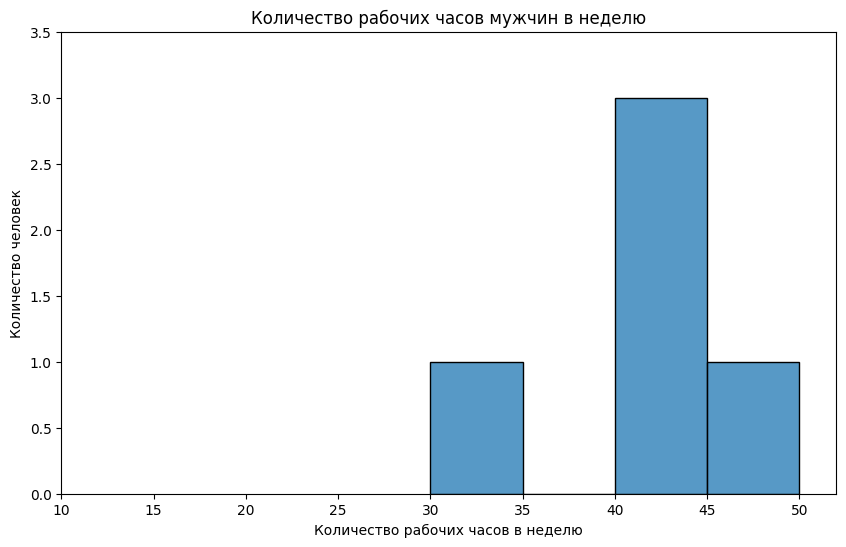

In [ ]:
plt.figure(figsize=(10,6))
plt.title(label="Количество рабочих часов мужчин в неделю")
sns.histplot(data = male['hours-per-week'])
plt.xlim(left = 10, right = 52)
plt.ylim(0,3.5)
plt.xlabel("Количество рабочих часов в неделю")
plt.ylabel("Количество человек")

Text(0, 0.5, 'Количество человек')

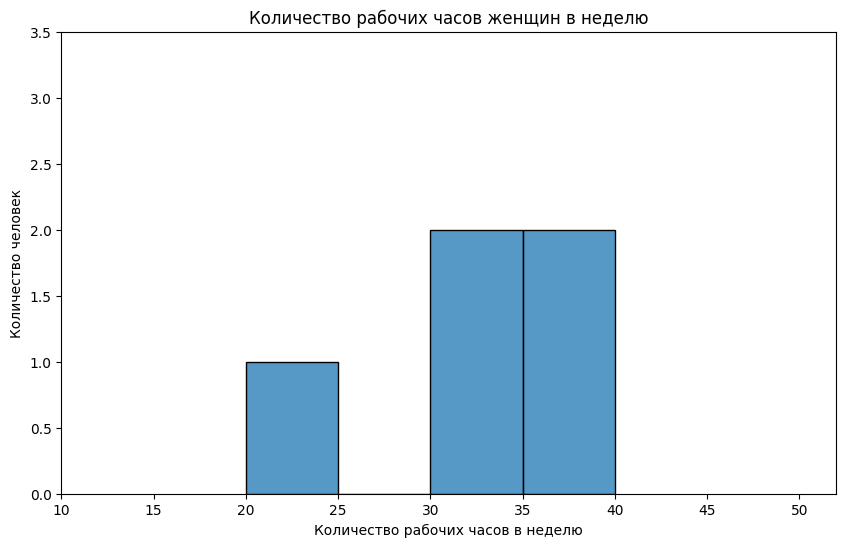

In [ ]:
plt.figure(figsize=(10,6))
plt.title(label="Количество рабочих часов женщин в неделю")
sns.histplot(data = female['hours-per-week'])
plt.xlim(left = 10, right = 52)
plt.ylim(0,3.5)
plt.xlabel("Количество рабочих часов в неделю")
plt.ylabel("Количество человек")

Вывод: Согласно данным графикам больше всего женщин работают от 30 до 40 часов в неделю, а мужчин от 40 до 45. Соответственно мужчины в среднем работают больше часов в неделю чем женщины.

In [ ]:
income = selected_columns.copy()
income["income"] = y
income.head()

,age,educational-num,hours-per-week,gender,income
0,25,7,40,1,0
1,38,9,50,1,0
2,28,12,40,1,1
3,44,10,40,1,1
4,18,10,30,0,0


<Axes: title={'center': "Корреляция признаков с целевой переменной 'income'(доход)"}>

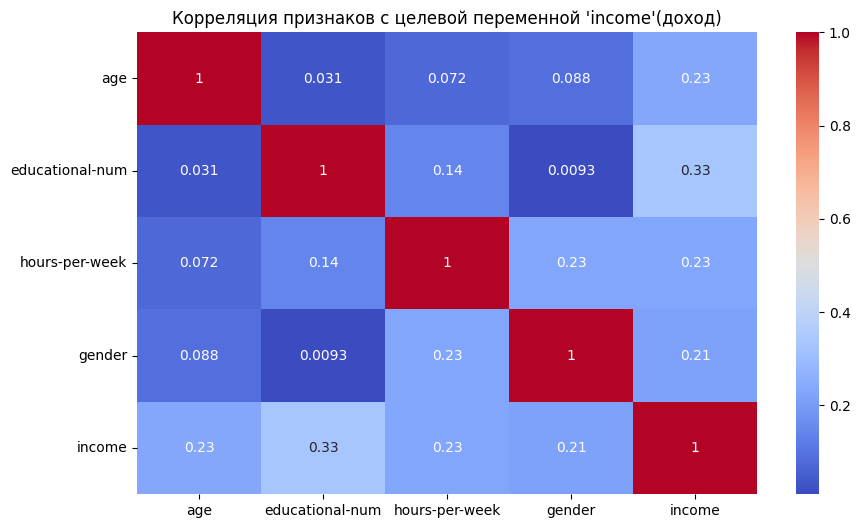

In [ ]:
plt.figure(figsize=(10,6))
plt.title(label="Корреляция признаков с целевой переменной 'income'(доход)")
sns.heatmap(income.corr(), annot=True, cmap="coolwarm")

Вывод: Согласно диаграмме корреляции наблюдается слабая положительная корреляция между признаками и целевой переменной

In [ ]:
X = selected_columns
X.head()

,age,educational-num,hours-per-week,gender
0,25,7,40,1
1,38,9,50,1
2,28,12,40,1
3,44,10,40,1
4,18,10,30,0


In [ ]:
le.fit(data['income'])

LabelEncoder()

In [ ]:
y = pd.Series( data = le.transform( data['income'] ) )
y.head()

0    0
1    0
2    1
3    1
4    0
dtype: int64

In [ ]:
X.head()

,age,educational-num,hours-per-week,gender,income
0,25,7,40,1,0
1,38,9,50,1,0
2,28,12,40,1,1
3,44,10,40,1,1
4,18,10,30,0,0


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
lr.fit(X_train, y_train)

LogisticRegression()

In [ ]:
lr.predict_proba(X_test)

array([[0.87640541, 0.12359459],
       [0.900141  , 0.099859  ],
       [0.75506155, 0.24493845],
       ...,
       [0.91817759, 0.08182241],
       [0.55403459, 0.44596541],
       [0.89037126, 0.10962874]])

In [ ]:
lr.score(X_train, y_train)

0.8004036385972096

In [ ]:
lr.score(X_test, y_test)

0.8026342728451512

In [ ]:
selected_columns.corr()

,age,educational-num,hours-per-week,gender,income
age,1.000000,0.030940,0.071558,0.088120,0.230369
educational-num,0.030940,1.000000,0.143689,0.009328,0.332613
hours-per-week,0.071558,0.143689,1.000000,0.228560,0.227687
gender,0.088120,0.009328,0.228560,1.000000,0.214628
income,0.230369,0.332613,0.227687,0.214628,1.000000


In [ ]:
from sklearn.pipeline import make_pipeline  # используем пайплайны для удобства
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [ ]:
clf = make_pipeline(StandardScaler(), SVC(kernel='poly'))

In [ ]:
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(kernel='poly'))])

In [ ]:
clf.score(X_train, y_train)

0.793647079470005

In [ ]:
clf.score(X_test, y_test)

0.8013376100457245

Вывод: Точность предсказания модели логистической регрессии 80% и не увеличилась после применения модели опорных векторов. Можно попробовать взять другие признаки для модели, так как наблюдалась слабая корреляция между признаками и целевой переменной